In [1]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten,Dense
import numpy as np


In [2]:
df = pd.read_csv("D:\Deep Learning\Deep Learning - Datasets\MNIST\mnist_784_csv.csv")

In [3]:
df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [4]:
y=df['class']
x=df.drop(labels=['class'],axis=1)

In [5]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
y

0        5
1        0
2        4
3        1
4        9
        ..
69995    2
69996    3
69997    4
69998    5
69999    6
Name: class, Length: 70000, dtype: int64

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [8]:
x_train.shape

(56000, 784)

In [9]:
x_test.shape

(14000, 784)

In [10]:
x_train = x_train/255.0
x_test = x_test/255.0

In [11]:

noise_factor = 0.2

x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=x_train.shape)
x_test_noisy = x_test  + noise_factor * np.random.normal(loc=0.0,scale=1.0, size=x_test.shape)

In [14]:
x_train_noisy = np.clip(x_train_noisy,0.,1.)
x_test_noisy = np.clip(x_test_noisy,0.,1.)

In [15]:
model = Sequential([
    Dense(500,input_shape=(784,),activation='relu'),
    Dense(300,activation='relu'),
    Dense(100,activation='relu'),
    Dense(300,activation='relu'),
    Dense(500,activation='relu'),
    Dense(784,activation='sigmoid'),
])

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy')

In [17]:
H = model.fit(x_train_noisy,x_train,epochs=20,batch_size=100)

Epoch 1/20
560/560 [==============================] - 9s 14ms/step - loss: 0.1614
Epoch 2/20
560/560 [==============================] - 8s 14ms/step - loss: 0.1051
Epoch 3/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0957
Epoch 4/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0913
Epoch 5/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0882
Epoch 6/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0862
Epoch 7/20
560/560 [==============================] - 8s 15ms/step - loss: 0.0845
Epoch 8/20
560/560 [==============================] - 8s 15ms/step - loss: 0.0833
Epoch 9/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0824
Epoch 10/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0815
Epoch 11/20
560/560 [==============================] - 14s 25ms/step - loss: 0.0809
Epoch 12/20
560/560 [==============================] - 8s 14ms/step - loss: 0.0803
Epoch 13/20


In [18]:
predicted = model.predict(x_test)

438/438 [==============================] - 2s 4ms/step


In [19]:
predicted.shape

(14000, 784)

In [20]:
predicted = predicted.reshape(predicted.shape[0],28,28)

In [23]:
x_test_noisy = np.array(x_test_noisy)
X_TEST_NOISY = x_test_noisy.reshape(x_test_noisy.shape[0],28,28)

input


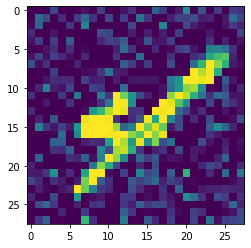

In [25]:
import random 
import matplotlib.pyplot as plt
n = random.randint(0,1000)
print("input")
plt.imshow(X_TEST_NOISY[n])

output


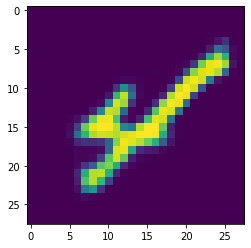

In [26]:
print("output")
plt.imshow(predicted[n])

In [28]:
print("target")
x_test = x_test.reshape(x_test.shape[0],28,28)
plt.imshow(x_test[n])

target


AttributeError: 'DataFrame' object has no attribute 'reshape'